# A whirlwind Tour Of Python

## 0. What you will learn

Our aim in this workshop is to make you familiar with the basics of Python, focusing on those aspects that will jump-start your ability to write data-science programs. 

Accordingly, we will cover fundamental python concepts including variables, lists, dictionaries, iteration, and functions; moving on to useful list like objects such as Pandas Series and numpy `ndarray`s, and their use in analyzing and making plots of data.

Here is the outline:

1. Getting Started
2. Libraries and Functions
3. Dictionaries
4. Listiness
5. Plotting with matplotlib
6. Putting it all together

We will end up with the code shown below, which leads to a plot of unemployment rates in multiple American states. This example exercises all basic python concepts for data science..if you understand it you are golden! 

Finally, a homework problem will help cement your understanding, and make you even more dangerous!

Here is what the unemployment data looks like:


```
DATE,FLUR
1976-01-01,9.7
1976-02-01,9.7
1976-03-01,9.6
1976-04-01,9.5
1976-05-01,9.3
1976-06-01,9.2
1976-07-01,9.1
1976-08-01,9.1
1976-09-01,9.1
1976-10-01,9.1
1976-11-01,9.1
1976-12-01,9.1
1977-01-01,9.0
```

...And here is the code...

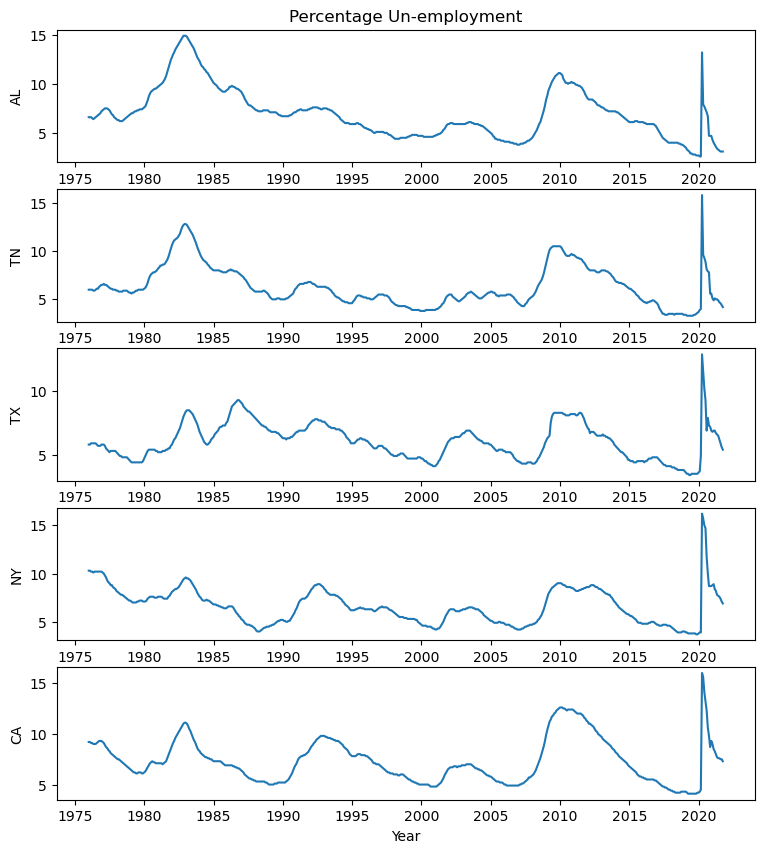

In [ ]:
# various imports of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ask matplotlib to plot in notebooks
%matplotlib inline

# setting up plot sizes
width_inches = 9
subplot_height_inches = 2

# where is our data?
baseurl = "https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/"

# defining a function to load and clean unemployment data
def get_unemployment_data(state_abbrev):
    # fetch and read csv file into a dataframe
    data = pd.read_csv(baseurl+"data/"+state_abbrev+"UR.csv")
    # convert date to a python datetime object
    data['DATE'] = pd.to_datetime(data['DATE'])
    return data

# creating a dictionary the hold the data, with
# the lookup keys being the state abbreviations
states = ['AL', 'TN', 'TX', 'NY', 'CA']
state_data=dict()
for abbrev in states:
    state_data[abbrev] = get_unemployment_data(abbrev)
    
# plotting the data    

# create as many subplots as we have states
fig, ax = plt.subplots(nrows=len(states), 
                       figsize = (width_inches, subplot_height_inches*len(states)))

counter = 0
for state_abbrev in states:
    # get daraframe from dictionary
    data = state_data[state_abbrev]
    # plot the data
    ax[counter].plot(data['DATE'], data[state_abbrev+'UR'])
    # label which state it is
    ax[counter].set_ylabel(state_abbrev)
    counter = counter + 1
# Year label only below last subplot
ax[4].set_xlabel("Year")

# title only on first subplot
ax[0].set_title("Percentage Un-employment");

## 1. Getting Started

Lets start at the very beginning. You can use Python as a calculator. Lets do some arithmetic in Python.

### Arithmetic Operators

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/calculator.png)

In [ ]:
1 + 1

In [ ]:
2**10 # 2 to the power of 10

In [ ]:
5/2

In [ ]:
5//2 # integer division

In [ ]:
5 % 2 # get the remainder

### Variables

Variables are labels for values

- Start with a letter or underscore
- Can contain only alpha-numeric characters and underscore
- Are case sensitive

In [ ]:
Var = "hello" # CANT DO THIS 9variable = "hello"
Var

What happened above? In the computer's memory, a location was found, and then filled with the word "hello". Then a variable Var was created and was used to label this memory location.

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/labelmem.jpg)

A variable is literally a label. You can think of it as a post-it, or sticky note, or a pointer. This is an abstraction which works.

Do not think of it as a box in which a value is stored. This is an abstraction that does not work.


### Types

Python is a **typed** language. That is, values in Python have types. The most general type is `Object`. But there are more specific ones, and you can define your own.

Variables can point to values of different types. See below:

In [ ]:
var_integer = 7
print ("INTEGER", var_integer, type(var_integer))
var_float = 7.01
print ("FLOAT", var_float, type(var_float))
var_string = "Hello World!"
print ("STRING", var_string, type(var_string))
var_boolean = True
print ("BOOLEAN", var_boolean, type(var_boolean))

Python, as you might expect, also has the concept of a list:

In [ ]:
mylist = [1, 2, 3, 4, 5, 6, 7, 8]
type(mylist)

In [ ]:
for item in mylist:
    print(item, type(item))

Notice the indentation: python dispenses with brackets and uses a colon and indentation (here 4 spaces) to denote that the `print` statement runs in the context of our list.

You can also get the length of the list:

In [ ]:
len(mylist)

Lists have indexes. Like elevators in other countries, python indexes starting with the "ground floor", or index 0. So the index of the first element is 0, the second is 1, and so on. By convention, the index -1 is the last element in the list, -2 the second-last and so on.

In [ ]:
anotherlist = [15, 89, 33, 56]
anotherlist[0]

In [ ]:
anotherlist[1]

In [ ]:
anotherlist[-1]

In [ ]:
anotherlist[-2]

### Comparisons

Python has comparison operators, which can be used to make decisions:

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/condslide.png)

In [ ]:
a = "hgi"
b = "hello"
c = "hi"
d = "hello"
print (a==c)
print (b==d)
var1 = 5
var2 = 3
print (var1 < var2)

The first comparison compares the contents of the memory for a and c and finds that both are different, giving us False. Conversely, the second comparison gives us True. We can utilize such comparisons in "decision statements". The third is a numerical comparison. The fact that these comparisons give us a boolean value can be used in the decision-making:

In [ ]:
var1 = 5
var2 = 10

if (var1 == var2):
    print("The values are equal")
elif (var1 < var2):
    print("First variable is lesser than the second variable")
else:
    print("Second variable is lesser than the first variable")

Notice again how python dispenses with brackets, replacing them by a colon and an indented next line. The indentation tells us that the code below runs when the condition holds. Python uses this colon-indentation for many things, such as in for loops for iteration, for conditionals, for function and class definition, etc.

Indeed you can nest conditionals inside iteration, with this colon-indentation syntax, to make very readable and usable code!

In [ ]:
mylist = [1, 2, 3, 4, 5, 6, 7, 8]
for ele in mylist:
    if ele % 2 == 0: #even numbers only
        print(ele)

### Lists, again

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/lists.png)

Here is a list our initial code created:

In [ ]:
states = ['AL', 'TN', 'TX', 'NY', 'CA']

We have seen that you can create an empty list using the `list()` constructor, and add things to it using the `append` method. 

But the constructor can take arguments: a very useful one is the **range** object.. 

In [ ]:
lst = list(range(1,5))
lst

[1, 2, 3, 4]

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/listops.png)

How do you know that something is in a list?

In [ ]:
# Membership (using 'in' operator)
courses = ['PP', 'RD', 'JG']
'PP' in courses

True

### Comprehensions


There is a short-cut iteration syntax called a **list comprehension**, often used to construct new lists

In [ ]:
num = [4, 7, 2, 6, 3, 9]

In [ ]:
list_with_same_as_num = [e for e in num]
list_with_same_as_num

[4, 7, 2, 6, 3, 9]

In [ ]:
squared_list = [e*e for e in num]
squared_list

[16, 49, 4, 36, 9, 81]

In [ ]:
list_with_evens = [e for e in num if e % 2 == 0]
list_with_evens

[4, 2, 6]

## 2. Libraries and Functions

If all python did was to provide a calculator with variables that would not be very ineresting. We want to have access to pre-made **libraries** of functionality!

### Libraries

At the beginning of this notebook we defined some strange looking symbols:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

These are **imports** of **libraries** in the python ecosystem. They are also called **modules**. Having to write all of our code ourselves is no fun! Whats the whole point if we cant use code others have written for us?

These imports allow us to use existing libraries. More precisely they allow us to use functions defined by others in these libraries. 

For example, we can say:

```python
import pandas
df = pandas.read_csv("somefile.csv") # Use a function from the library
```

or use `as` to provide a short form for the library name:
```python
import pandas as pd
df = pd.read_csv("somefile.csv")
```

But what IS a function, exactly?

Combine with `if` to filter out some elements:

### Functions

A function is an **encapsulated** set of statements that take input, do some specific computation and produce output.

There are many ways to define functions:

- Functions can be built-in to python
- Functions can imported from an existing Python Library, including libraries you have installed
- A function can be user defined
- A function can be anonymous
- functions can belong to objects. These functions are called **methods**.

Properties of functions:

- A function can be called from other functions
- Can return data, or even other functions

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/runfuncs.png)

In [ ]:
# Built-in functions

var1 = -15
abs(var1)

Here are the two different ways of importing a function from a module.

In [ ]:
import os
os.cpu_count()

The special `from` syntax allows us to import just one function:

In [ ]:
from math import sqrt
sqrt(4)

Functions are not the only thing we can import: pre-defined variables representing constants or other objects (like a database connection) may be imported as well.

```python
import math
print(math.pi)
```

One can even import a single variable from a library, using the `from` syntax:

In [ ]:
from math import pi

Now let us **define our own function**:

In [ ]:
def circle_area(radius):
    area = pi*radius*radius
    return area
circle_area(10)

Notice the **indentation** of the function body, just as we did with conditional blocks....

One can define **anonymous functions** and assign them to variables:

In [ ]:
from math import sqrt
hypot = lambda x, y: sqrt(x*x + y*y) # imported from math
hypot(3,4)

In data science these are often used to define one-line math functions...

Functions can have default values which the function may be used without...

In [ ]:
def register(name, affiliation="Student"):
    print(f"{name} is a {affiliation}")

This function does not return "anything. Indeed, if you try and capture its return value in a variable, it is the special python type `None`

In [ ]:
capture = register("Rahul", affiliation="Teacher")
print(capture, type(capture))

Rahul is a Teacher
None <class 'NoneType'>


In [ ]:
register("John")

John is a Student


## 2. Functions are First Class objects

This means that functions can act as objects, and thus be represented as variables. For example:

In [ ]:
square = lambda x: x*x

The further meaning of this is that you can return functions from functions just as you return variables, and pass functions into functions, just as you would pass variables. This means that you can achieve very general functionality easily.

In [ ]:
def sum_of_squares(x, y):
    return x*x + y*y
sum_of_squares(3, 4)

25

You should test the functions you write. The idea here is you take some cases and make sure these give you the right answer:

In [ ]:
assert sum_of_squares(3, 4) == 25 # this is an expression, not a function

If somehow you got the implementation wrong, you would get the wrong answer.

In [ ]:
def sum_of_squares_wrong(x, y):
    return x*x + y*y*y
assert sum_of_squares_wrong(3, 4) == 25 

AssertionError: 

In [ ]:
def sum_of_cubes(x, y):
    return x*x*x + y*y*y
sum_of_cubes(3, 4)

91

Does this seem repetitive? You could instead do:

In [ ]:
def sum_of_anything(f, x, y):
    return f(x) + f(y)
sum_of_anything(square, 3, 4)

25

But python goes further! You can define functions inside of functions and return your defined functions..this is the other side of the coin of taking functions of arguments..you can return them as well. This further expands the menu of things you can do. For example:

In [ ]:
def soa(f): # sum anything, this returns a function
    def h(x, y):
        return f(x)+ f(y)
    return h 

Here we are writing a function `soa` that takes a function f as an argument, and returns a function h, which when executed takes two inputs, puts them through f, and then sums them. So:

In [ ]:
sum_of_squares = soa(square)
type(sum_of_squares)

function

In [ ]:
sum_of_squares(3,4)

25

Both of these styles of composition of functions may be used in python, and are key to programming with python in a **functional style**, as well as the **separation of aspects** in programming, which we shall see next.

## 2. Dictionaries

This `data['DATE']` syntax says: look up whats in the dataframe `data` under the **key** `DATE`. Give us that column. The key is like a word in a dictionary: you look up a word and get its meaning...here you look up the key and get the data associated with it.

Why is it like this?

It is because python has a **data structure** called a **dictionary**. The creators of Pandas wanted a dataframe to feel like a dictionary...

Let's learn a bit about dictionaries..

![](https://github.com/univai-ghf/ghfmedia/raw/main/images/dict.png)

A dictionary is a "bag" of **value**s, each with its own label, called a **key**. 

A unique 'key' is associated with each 'value' . The 'key' can be any **immutable data type**: boolean, float, int, tuple, string (but it is often a string)

Dictionaries themselves are "Mutable" (the values can be changed).

You can create a dictionary using the `{}` notation, which is an alias for calling the constructor `dict()`.

In [ ]:
# Creating a dictionary:
# 1. Using {}
empty_dict = {} 
print (type(empty_dict))
new_dict = { "day": 5, "venue": "GJB", "event": "Python Carnival!" }
print(new_dict)

<class 'dict'>
{'day': 5, 'venue': 'GJB', 'event': 'Python Carnival!'}


In [ ]:
another_empty_dict = dict()
another_empty_dict

{}

The `dict` constructor can take arguments to initialize the dictionary:

In [ ]:
#2. Using dict()
purse = dict(type="wallet", material="leather")
purse

{'type': 'wallet', 'material': 'leather'}

Getting and Setting values from a dictionary is easy:

In [ ]:
purse['type']

'wallet'

In [ ]:
purse['make'] = "Versace"
purse

{'type': 'wallet', 'material': 'leather', 'make': 'Versace'}

![](https://github.com/hult-cm3-rahul/LearningPython/raw/main/images/dictmethod.png)


### Listiness

How about other things that behave like lists?

Dictionaries are listy, with the iteration going the keys:

In [ ]:
purse

{'type': 'wallet', 'material': 'leather', 'make': 'Versace'}

In [ ]:
for key in purse:
    print(key,":",purse[key])

type : wallet
material : leather
make : Versace


Strings are listy too! And immutable to boot. This allows python to allocate memory sensibly for them and not have to worry about resizing

In [ ]:
s = "Hello"
for ch in s:
    print(ch)

H
e
l
l
o


In [ ]:
len(s)

5

In [ ]:
s[4] = 'a'

TypeError: 'str' object does not support item assignment

## 4. Tuples

They are a fast kind of sequence that functions much like a list - they have elements which are indexed starting at 0. They work exactly like lists, except that tuples can't be changed in place!! 

This means they are **immutable**, and this guarantee gives them their speed. We'll go into the reasons in a later class.

BASIC PROPERTIES:

- Ordered collections of arbitrary objects
- Accessed by index
- Of the category "immutable sequence"
- Fixed-length, heterogeneous and arbitrarily nested

The fixed length is important for performance. Unlike lists, they cannot be grown or shrunk.

There are some ways to make tuples:

In [ ]:
x = tuple() # tuple of length 0
type(x)

tuple

In [ ]:
y = (5, "hello") # tuple of length 2
y[0] = 9 ## immutable

TypeError: 'tuple' object does not support item assignment

This brings us to another listy construct, one that is critical in datascience...

In [ ]:
z = 1,2,3,4 # or z = (1, 2, 3, 4)
print(type(z))
print(z, len(z))

<class 'tuple'>
(1, 2, 3, 4) 4


In [ ]:
for item in z:
    print(item)

1
2
3
4


Why does this work?